## Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Import dataset

In [2]:
data = pd.read_csv('Admission_Predict.csv')

**quick look**

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.shape

(400, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [6]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


# Exploratory Data Analysis (EDA)

### Cleansing Data

**Check for Duplicates Data**

In [7]:
data = data.drop_duplicates()

In [8]:
data.shape #No Duplicate data after check shape columns and row

(400, 9)

**Missing Values and Data Type**

In [9]:
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [23]:
data.isnull().sum() # There is no null value

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

#### Check Distribution Data

University Rating, LOR, and Research no need to search outlier. University Rating because there is a rating and depend on rating. LOR (Letter Of Recommendation) because total of letter. Research because 0 and 1, like yes and no.

C:\Users\danie\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


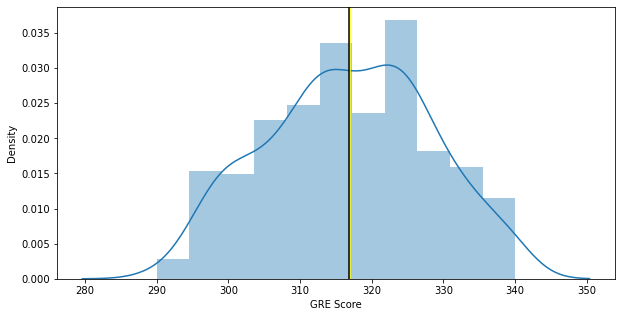

In [12]:
# Look Distribution of GRE Score
plt.figure(figsize=(10,5))
sns.distplot(data['GRE Score'])
plt.axvline(data['GRE Score'].median(),color='yellow')
plt.axvline(data['GRE Score'].mean(),color='black')
plt.show()
# No Outlier

C:\Users\danie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


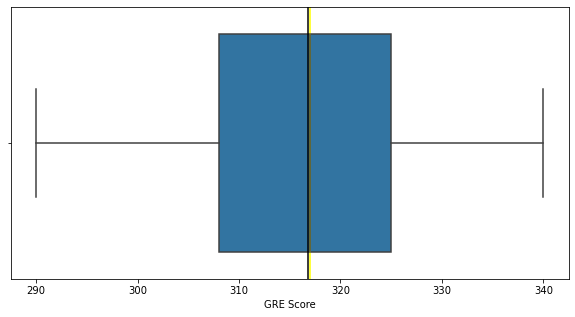

In [13]:
# Look Distribution of GRE Score with bloxplot
plt.figure(figsize=(10,5))
sns.boxplot(data['GRE Score'])
plt.axvline(data['GRE Score'].median(),color='yellow')
plt.axvline(data['GRE Score'].mean(),color='black')
plt.show()
# No Outlier

C:\Users\danie\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


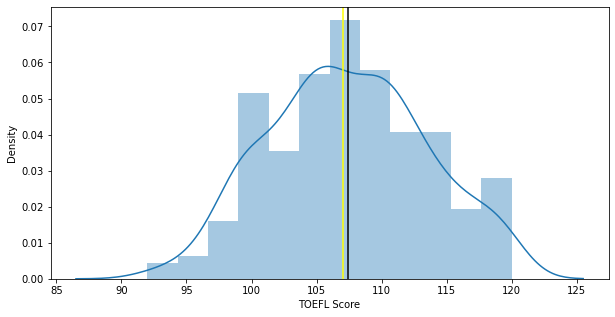

In [15]:
# Look Distribution of TOEFL Score
plt.figure(figsize=(10,5))
sns.distplot(data['TOEFL Score'])
plt.axvline(data['TOEFL Score'].median(),color='yellow')
plt.axvline(data['TOEFL Score'].mean(),color='black')
plt.show()
# No Outlier

C:\Users\danie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


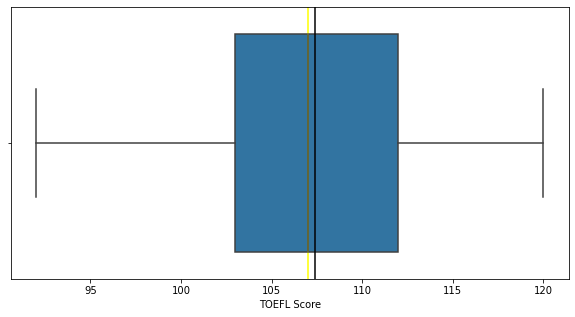

In [14]:
# Look Distribution of TOEFL Score with bloxplot
plt.figure(figsize=(10,5))
sns.boxplot(data['TOEFL Score'])
plt.axvline(data['TOEFL Score'].median(),color='yellow')
plt.axvline(data['TOEFL Score'].mean(),color='black')
plt.show()
# No Outlier

C:\Users\danie\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


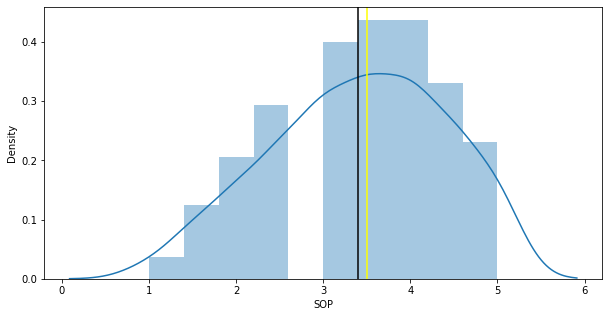

In [18]:
# Look Distribution of SOP
plt.figure(figsize=(10,5))
sns.distplot(data['SOP'])
plt.axvline(data['SOP'].median(),color='yellow')
plt.axvline(data['SOP'].mean(),color='black')
plt.show()
# No Outlier

C:\Users\danie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


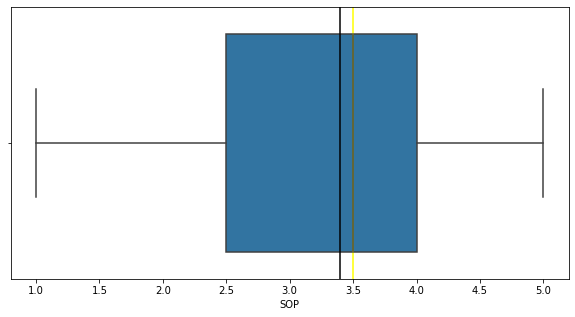

In [19]:
# Look Distribution of SOP with bloxplot
plt.figure(figsize=(10,5))
sns.boxplot(data['SOP'])
plt.axvline(data['SOP'].median(),color='yellow')
plt.axvline(data['SOP'].mean(),color='black')
plt.show()
# No Outlier

C:\Users\danie\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


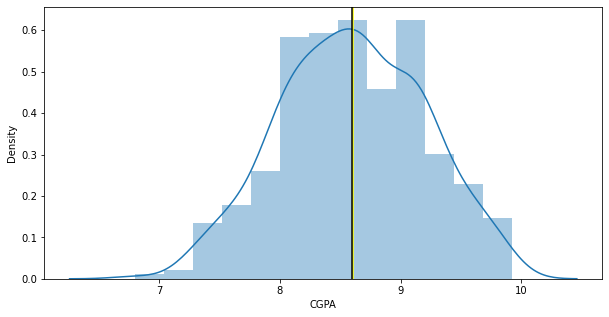

In [32]:
# Look Distribution of CGPA
plt.figure(figsize=(10,5))
sns.distplot(data['CGPA'])
plt.axvline(data['CGPA'].median(),color='yellow')
plt.axvline(data['CGPA'].mean(),color='black')
plt.show()
# there is one outlier
# can change with median

C:\Users\danie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


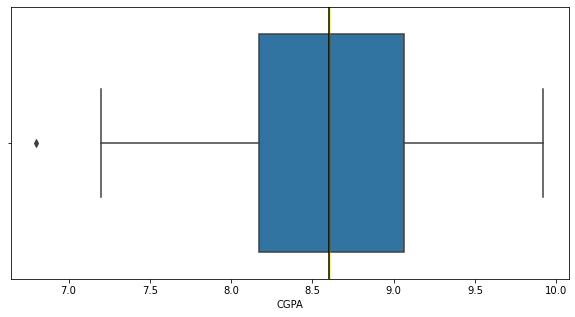

In [31]:
# Look Distribution of CGPA with bloxplot
plt.figure(figsize=(10,5))
sns.boxplot(data['CGPA'])
plt.axvline(data['CGPA'].median(),color='yellow')
plt.axvline(data['CGPA'].mean(),color='black')
plt.show()
# there is one outlier
# can change with median

C:\Users\danie\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


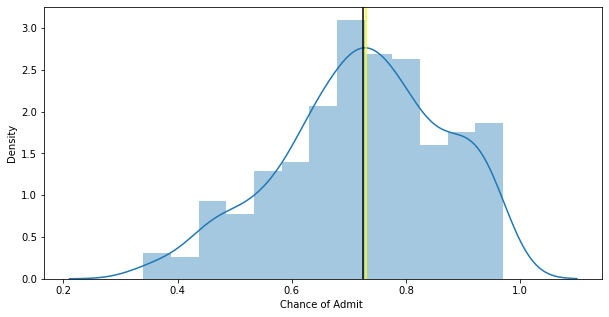

In [40]:
# Look Distribution of Chance of Admit
plt.figure(figsize=(10,5))
sns.distplot(data['Chance of Admit '])
plt.axvline(data['Chance of Admit '].median(),color='yellow')
plt.axvline(data['Chance of Admit '].mean(),color='black')
plt.show()
# there are several outlier
# can change with median

C:\Users\danie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


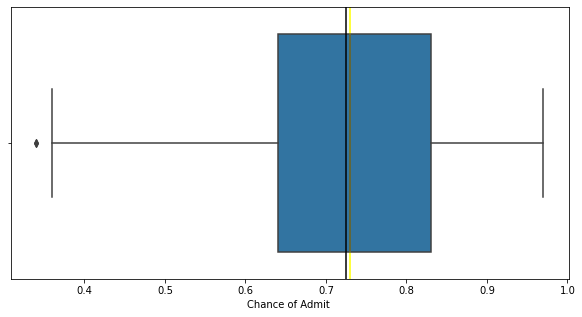

In [42]:
# Look Distribution of Chance of Admit with bloxplot
plt.figure(figsize=(10,5))
sns.boxplot(data['Chance of Admit '])
plt.axvline(data['Chance of Admit '].median(),color='yellow')
plt.axvline(data['Chance of Admit '].mean(),color='black')
plt.show()
# there are several outlier
# can change with median

Check and Handling Outlier

In [29]:
# Make function to detect outlier using IQR Method
def check_outlier(data):
    Q1=data.quantile(0.25)
    Q3=data.quantile(0.75)
    IQR=Q3-Q1
    lower_range = Q1 -(1.5 * IQR)
    upper_range = Q3 +(1.5 * IQR)
    
    number_outlier=len(data[data>upper_range])+len(data[data<lower_range])
    print("Total number of Outlier From Variable {} : {}".format(data.name, number_outlier))
    print("Upper Range Outlier From Variable {} : {}".format(data.name, len(data[data>upper_range])))    
    print("Lower Range Outlier From Variable {} : {}\n".format(data.name, len(data[data<lower_range])))    

In [41]:
check_outlier(data['CGPA'])
check_outlier(data['Chance of Admit '])

Total number of Outlier From Variable CGPA : 1
Upper Range Outlier From Variable CGPA : 0
Lower Range Outlier From Variable CGPA : 1

Total number of Outlier From Variable Chance of Admit  : 2
Upper Range Outlier From Variable Chance of Admit  : 0
Lower Range Outlier From Variable Chance of Admit  : 2



In [43]:
#See observation outliers on the CGPA lower range variable
Q1=data["CGPA"].quantile(0.25)
Q3=data["CGPA"].quantile(0.75)
IQR=Q3-Q1
lower_range = Q1 -(1.5 * IQR)
upper_range = Q3 +(1.5 * IQR)
data.loc[(data['CGPA']<lower_range),'CGPA']=lower_range
check_outlier(data['CGPA'])

Total number of Outlier From Variable CGPA : 0
Upper Range Outlier From Variable CGPA : 0
Lower Range Outlier From Variable CGPA : 0



In [44]:
#See observation outliers on the Chance of Admit lower range variable
Q1=data["Chance of Admit "].quantile(0.25)
Q3=data["Chance of Admit "].quantile(0.75)
IQR=Q3-Q1
lower_range = Q1 -(1.5 * IQR)
upper_range = Q3 +(1.5 * IQR)
data.loc[(data['Chance of Admit ']<lower_range),'Chance of Admit ']=lower_range
check_outlier(data['Chance of Admit '])

Total number of Outlier From Variable Chance of Admit  : 0
Upper Range Outlier From Variable Chance of Admit  : 0
Lower Range Outlier From Variable Chance of Admit  : 0



**Make Some Visualization**

<AxesSubplot:>

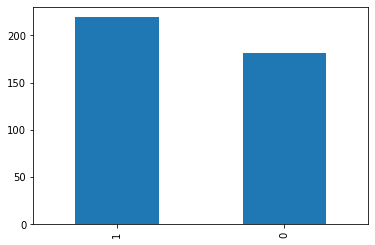

In [49]:
data['Research'].value_counts().plot.bar()
# There are almost same which university have research and did not have

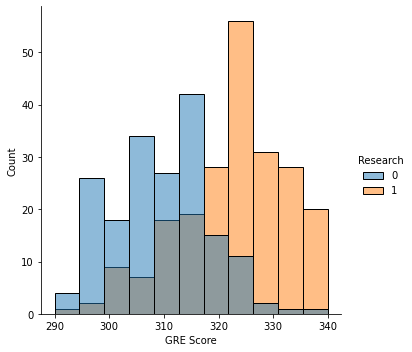

In [55]:
# Comparation Histogram Research every mark of GRE Score
sns.displot(data, x='GRE Score', hue='Research')
# From this data, show us that university which have research that have high GRE Score.

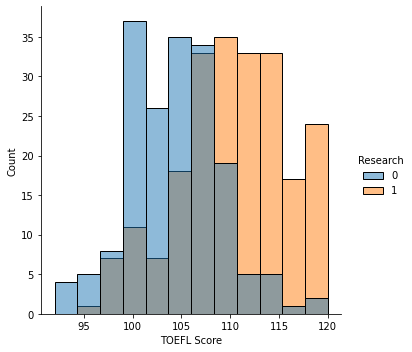

In [56]:
# Comparation Histogram Research every mark of TOEFL Score
sns.displot(data, x='TOEFL Score', hue='Research')
# From this data, show us that university which have research that have high TOEFL Score.

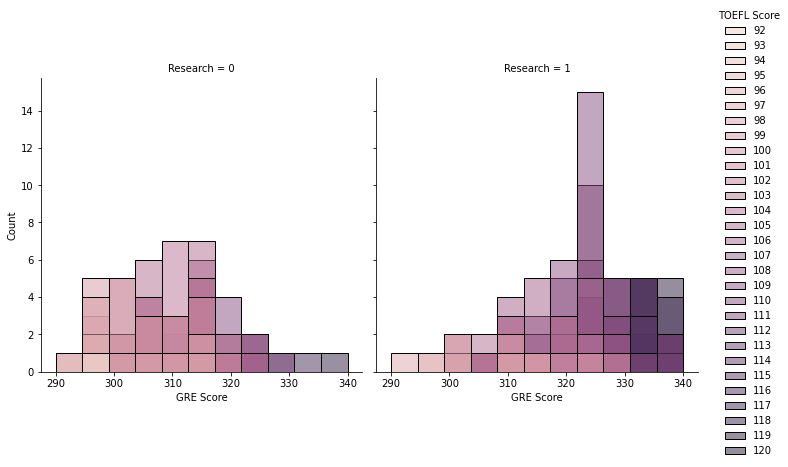

In [52]:
# Comparation Histogram price every kind of fuel type
sns.displot(data, x='GRE Score', hue='TOEFL Score', col='Research')
# From this data, show us that university which have research that have high GRE Score and TOEFL Score. 